In [1]:
import pandas as pd

customer_df = pd.read_excel('data/customer_data.xlsx')
customer_df

,cohort,user,time_year,time_month,subscription,content,genres,recency_new,bounce
0,0,0,2017,8,1,2.0,2.0,1.0000,0.5000
1,0,0,2017,9,1,1.0,1.0,1.0000,0.0000
2,0,1,2017,8,1,1.0,1.0,0.0000,1.0000
3,0,1,2017,9,1,1.0,1.0,0.0000,0.5000
4,0,2,2017,8,1,12.0,4.0,0.2500,0.0000
...,...,...,...,...,...,...,...,...,...
31672,11,20170,2018,7,1,2.0,2.0,0.5000,1.0000
31673,11,20171,2018,7,1,3.0,2.0,0.3333,0.6667
31674,11,20172,2018,7,1,1.0,1.0,1.0000,1.0000
31675,11,20173,2018,7,1,4.0,3.0,0.2500,0.0000


In [2]:
from utilities import CohortDateMapper

cdm = CohortDateMapper(customer_df)
cdm.date_cohort_mapping

{0: (2017, 8),
 1: (2017, 9),
 2: (2017, 10),
 3: (2017, 11),
 4: (2017, 12),
 5: (2018, 1),
 6: (2018, 2),
 7: (2018, 3),
 8: (2018, 4),
 9: (2018, 5),
 10: (2018, 6),
 11: (2018, 7)}

In [3]:
#2-a how many new user were acquired
how_many_new_users = len(customer_df['user'].drop_duplicates())
how_many_new_users

20175

In [4]:
#2-a when does the time window of the data start
start_date = cdm.date_cohort_mapping[0]
start_date

(2017, 8)

In [5]:
#2-b how many new users did netflix acquire each month / initial size of the cohorts
users_per_cohort = dict()

for cohort in range(0, 12):
    cohort_df = customer_df[customer_df['cohort'] == cohort]
    new_customers = len(cohort_df['user'].drop_duplicates())
    users_per_cohort[cohort] = new_customers

users_per_cohort

{0: 1771,
 1: 1352,
 2: 1743,
 3: 1794,
 4: 1557,
 5: 1952,
 6: 2050,
 7: 1586,
 8: 2317,
 9: 1371,
 10: 1266,
 11: 1416}

In [6]:
#to test above validity
c = 0
for _, users in users_per_cohort.items():
    c += users

c

20175

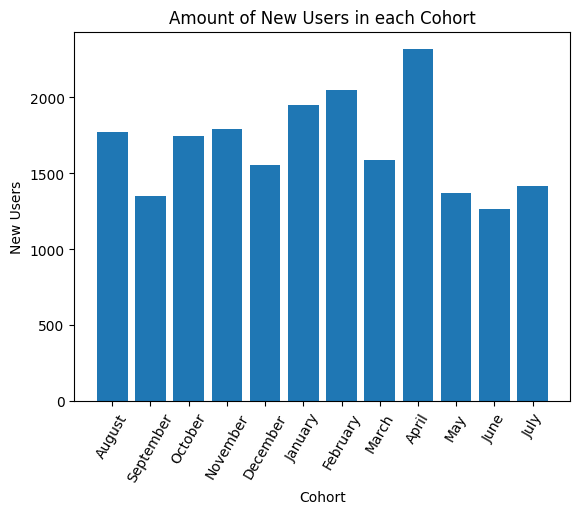

In [7]:
#2-c plotting numbers

import matplotlib.pyplot as plt

cohorts, users = zip(*list(users_per_cohort.items()))
months = cdm.periods_to_months(cohorts)

plt.bar(months, users)

plt.xlabel('Cohort')
plt.xticks(rotation=60)

plt.ylabel('New Users')
plt.title('Amount of New Users in each Cohort')
plt.show()

In [8]:
#2-d
observed_users_per_period = dict()

for cohort in range(0, 12):
    year, month = cdm.date_cohort_mapping[cohort]
    date_index = (customer_df['time_year'] == year) & (customer_df['time_month'] == month)
    cohort_df = customer_df[date_index]
    observed_users = len(cohort_df['user'].drop_duplicates())
    observed_users_per_period[cohort] = observed_users

observed_users_per_period

{0: 1771,
 1: 2281,
 2: 2418,
 3: 2655,
 4: 3050,
 5: 3200,
 6: 3369,
 7: 3165,
 8: 3268,
 9: 2749,
 10: 2102,
 11: 1649}

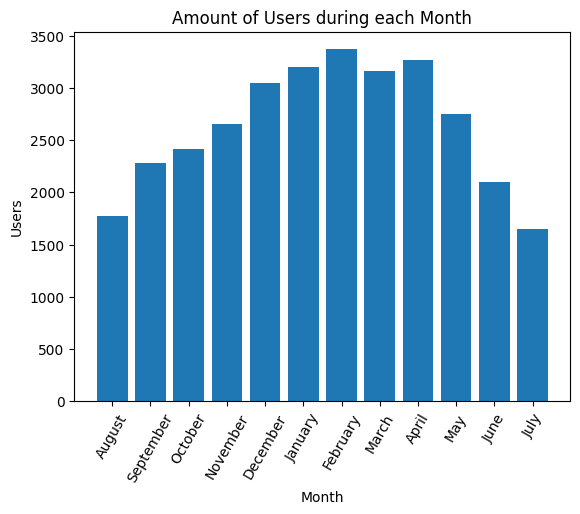

In [9]:
cohorts, users = zip(*list(observed_users_per_period.items()))
months = cdm.periods_to_months(cohorts)

plt.bar(months, users)

plt.xlabel('Month')
plt.xticks(rotation=60)

plt.ylabel('Users')
plt.title('Amount of Users during each Month')
plt.show()